<a href="https://colab.research.google.com/github/Carvalhocqc00/Challenger_Toledo_2023/blob/main/Challenger_Toledo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Chalenger Toledo/Base/GestaoIndicador - Massa 1.xlsx', header = 1)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Columns: 253 entries, Data to Quantidade de erros de comunicação - Célula 24
dtypes: float64(176), int64(73), object(4)
memory usage: 9.7+ MB


In [ ]:
dados_celula = dados.copy()
dados_celula = dados_celula.dropna(axis=1)

In [ ]:
dados_celula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 93 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Data                                            5017 non-null   object 
 1   Hora                                            5017 non-null   object 
 2   Bruto                                           5017 non-null   int64  
 3   Tara                                            5017 non-null   int64  
 4   Líquido                                         5017 non-null   int64  
 5   Expandido                                       5017 non-null   int64  
 6   Tipo do envio da mensagem                       5017 non-null   object 
 7   Décimo de incremento                            5017 non-null   int64  
 8   Zero capturado                                  5017 non-null   int64  
 9   Manutenção do zero                       

In [ ]:
dados_celula['Data e Hora'] = dados_celula['Data'] + 'T' + dados_celula['Hora']

In [ ]:
dados_celula.sort_values('Data e Hora', inplace=True)

In [ ]:
dados_celula

,Data,Hora,Bruto,Tara,Líquido,Expandido,Tipo do envio da mensagem,Décimo de incremento,Zero capturado,Manutenção do zero,...,Temperatura Placa - Célula 8,Temperatura - Célula 8,Número de resets identificados - Célula 8,Número de erros exibidos no display - Célula 8,Número de erros de comunicação - Célula 8,Erro de ADC - Célula 8,Quantidade erros de ADC - Célula 8,Quantidade de erros de E2PROM - Célula 8,Quantidade de erros de comunicação - Célula 8,Data e Hora
5016,03/06/2023,11:09:21.6466667,-300,0,-300,0,Automatica,-303,0,0,...,19.5000,18.8125,36,2,0,0,0,0,2,03/06/2023T11:09:21.6466667
5015,03/06/2023,11:09:26.5900000,0,0,0,0,Automatica,0,-303,302,...,19.5625,18.8125,36,2,0,0,0,0,2,03/06/2023T11:09:26.5900000
5014,03/06/2023,11:10:24.8033333,13400,0,13400,0,Automatica,13397,-303,294,...,20.8750,18.8125,36,2,0,0,0,0,2,03/06/2023T11:10:24.8033333
5013,03/06/2023,11:10:29.9433333,13420,0,13420,0,Automatica,13415,-303,294,...,20.9375,18.8125,36,2,0,0,0,0,2,03/06/2023T11:10:29.9433333
5012,03/06/2023,11:12:24.4300000,10,0,10,0,Automatica,5,-303,294,...,22.4375,18.8750,36,2,0,0,0,0,2,03/06/2023T11:12:24.4300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,19/05/2023,03:10:43.9766667,70,0,70,0,Automatica,69,-311,345,...,17.6875,14.1250,35,2,0,0,0,0,2,19/05/2023T03:10:43.9766667
3,19/05/2023,03:10:58.1800000,0,0,0,0,Automatica,1,-311,345,...,17.6875,14.1250,35,2,0,0,0,0,2,19/05/2023T03:10:58.1800000
2,19/05/2023,03:25:59.1333333,0,0,0,0,Automatica,0,-311,345,...,17.6250,14.0000,35,2,0,0,0,0,2,19/05/2023T03:25:59.1333333
1,19/05/2023,03:40:59.9500000,0,0,0,0,Automatica,0,-311,345,...,17.4375,13.8750,35,2,0,0,0,0,2,19/05/2023T03:40:59.9500000


In [ ]:
dados_celula_selecionados = dados_celula.copy()

In [ ]:
dados_celula_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5017 entries, 5016 to 0
Data columns (total 94 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Data                                            5017 non-null   object 
 1   Hora                                            5017 non-null   object 
 2   Bruto                                           5017 non-null   int64  
 3   Tara                                            5017 non-null   int64  
 4   Líquido                                         5017 non-null   int64  
 5   Expandido                                       5017 non-null   int64  
 6   Tipo do envio da mensagem                       5017 non-null   object 
 7   Décimo de incremento                            5017 non-null   int64  
 8   Zero capturado                                  5017 non-null   int64  
 9   Manutenção do zero                       

In [ ]:
matriz = dados_celula.corr()

<ipython-input-11-5fa605bc2e28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = dados_celula.corr()




---



**Análise Preliminar**

In [ ]:
dados_celula_selecionados = dados_celula[['Data','Hora','Data e Hora','Bruto','Líquido','Tara','Zero capturado','Manutenção do zero','Counts - Célula 1','Temperatura Placa - Célula 1','Temperatura - Célula 1','Counts - Célula 2','Temperatura Placa - Célula 2','Temperatura - Célula 2','Counts - Célula 3','Temperatura Placa - Célula 3','Temperatura - Célula 3','Counts - Célula 4','Temperatura Placa - Célula 4','Temperatura - Célula 4','Counts - Célula 5','Temperatura Placa - Célula 5','Temperatura - Célula 5','Counts - Célula 6','Temperatura Placa - Célula 6','Temperatura - Célula 6','Counts - Célula 7','Temperatura Placa - Célula 7','Temperatura - Célula 7','Counts - Célula 8','Temperatura Placa - Célula 8','Temperatura - Célula 8']]

<ipython-input-13-b698e0a0ecdd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados_celula_selecionados.corr()


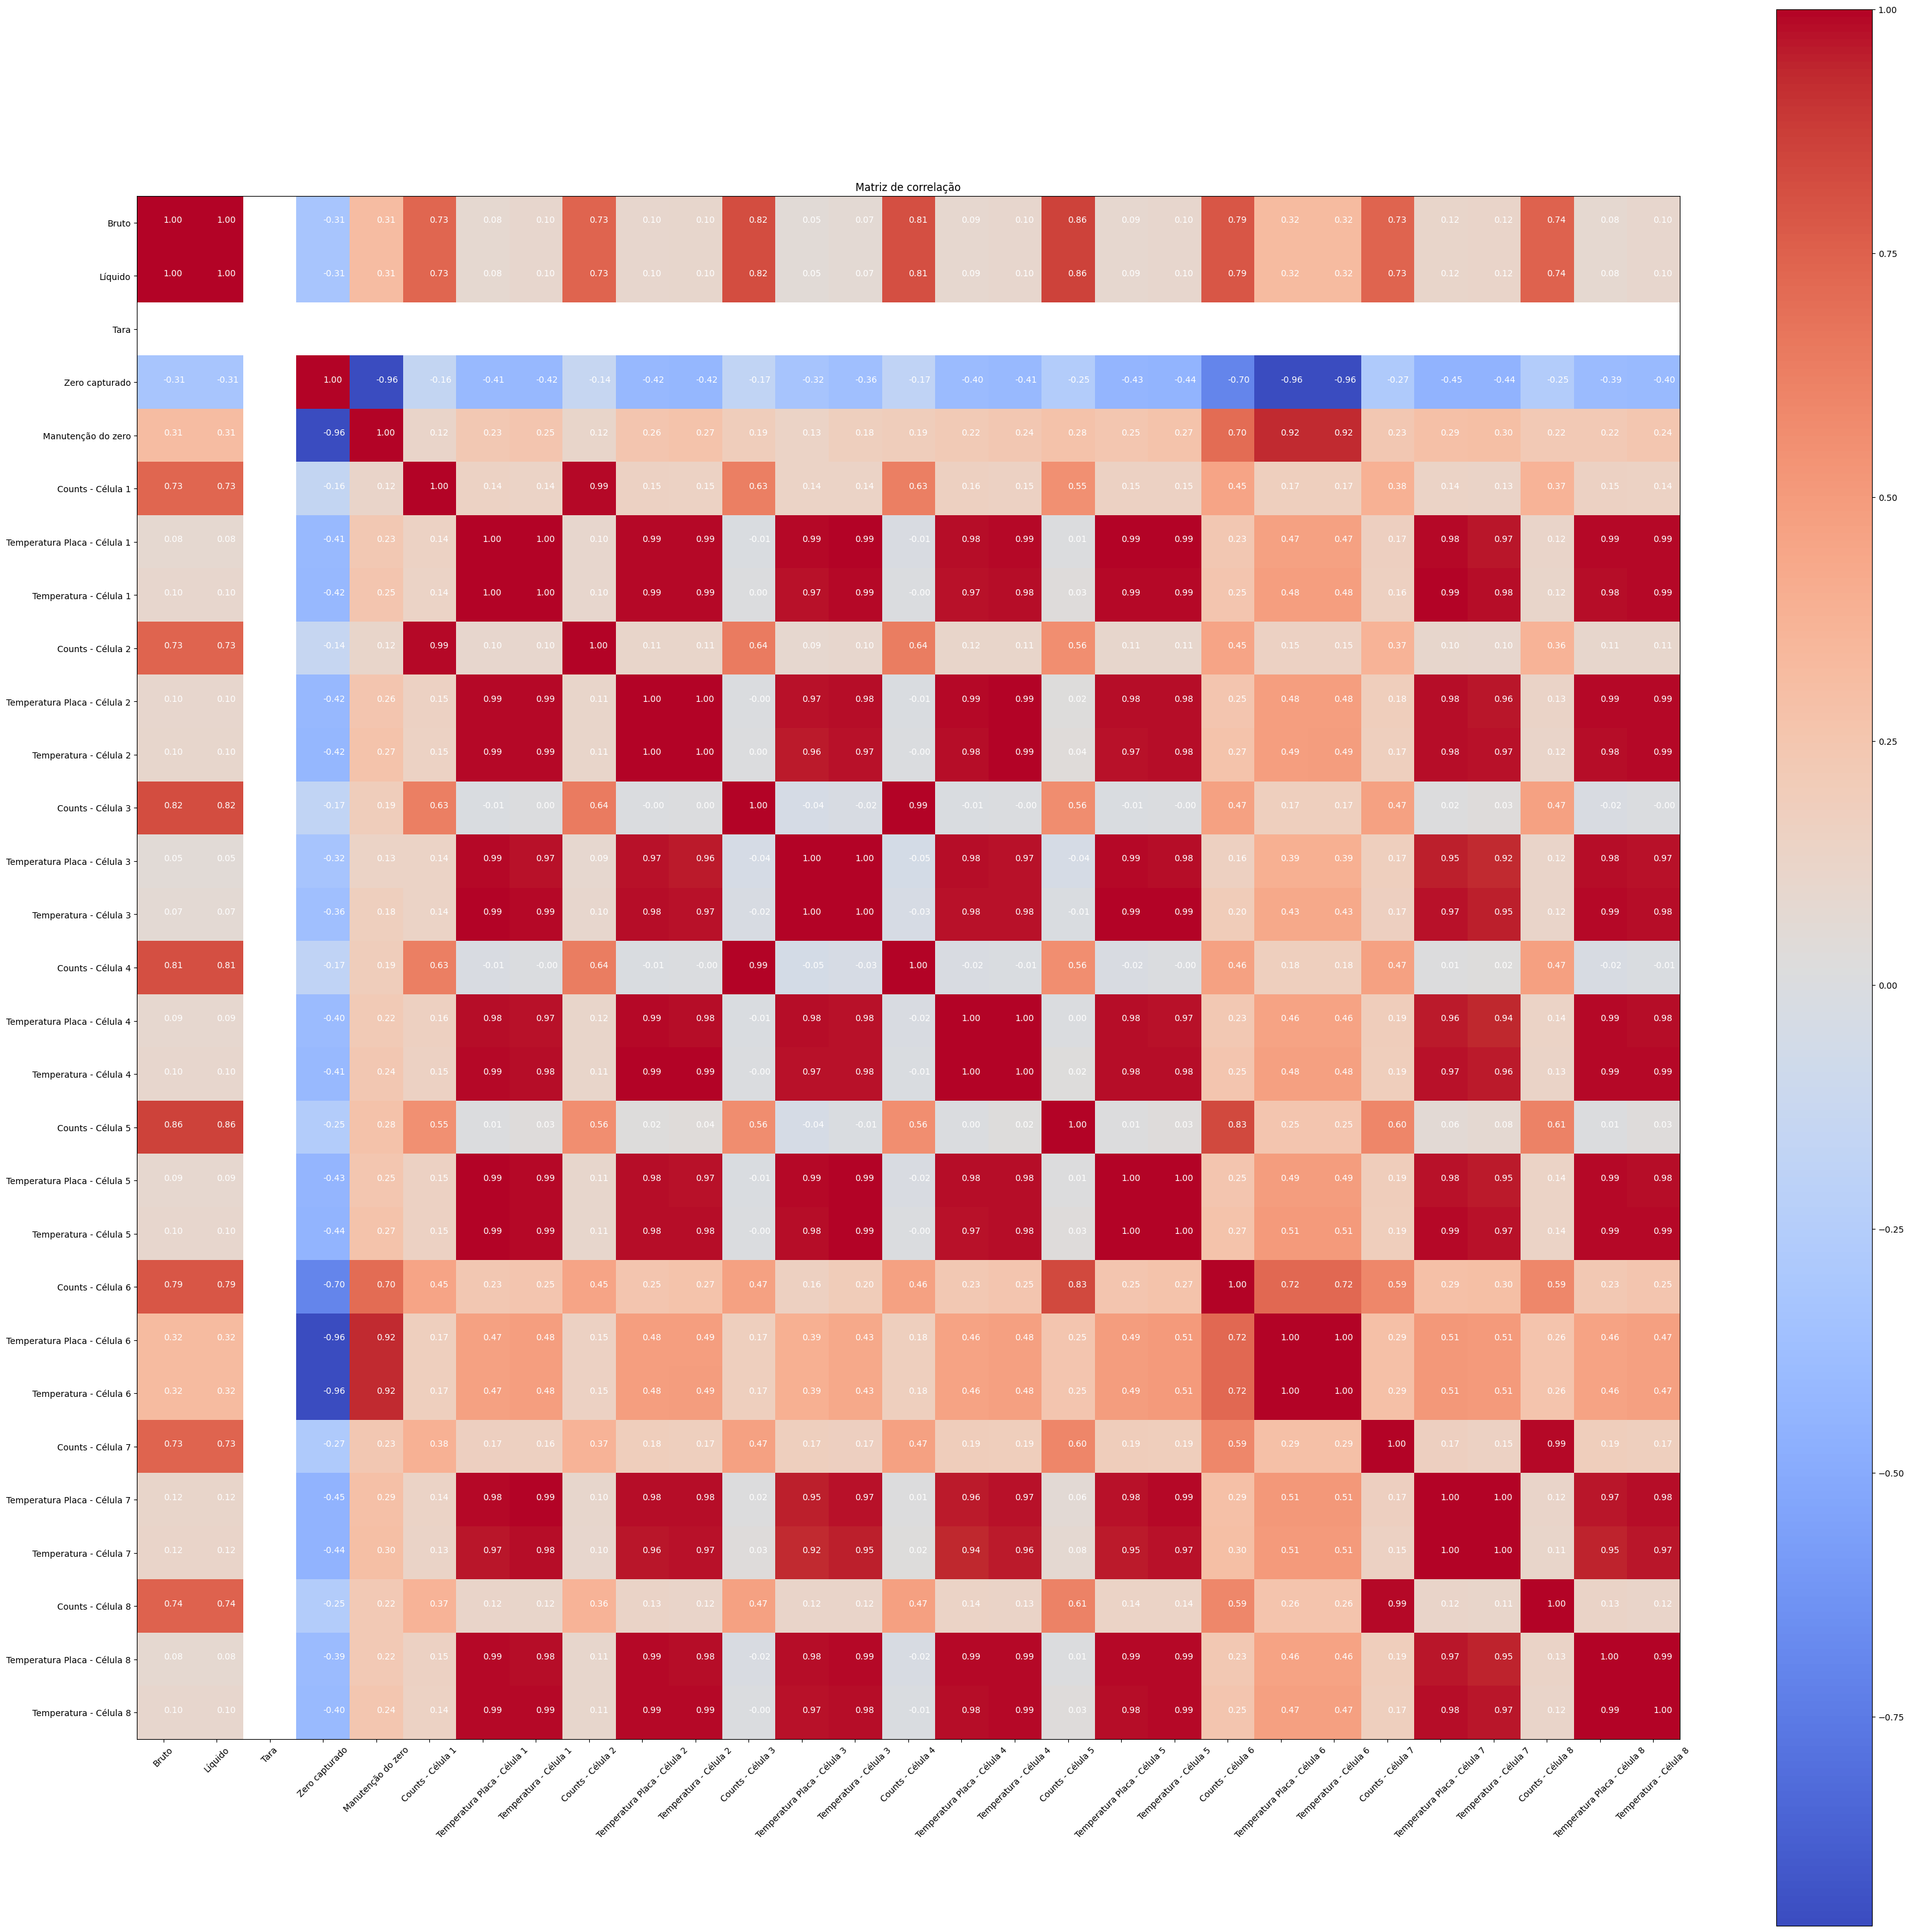

In [ ]:
corr = dados_celula_selecionados.corr()


plt.figure(figsize=(40, 40))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# Mostre as porcentagens de correlação no gráfico
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, f'{corr.iloc[i, j]:.2f}', color='white', size='10')

plt.title('Matriz de correlação')
plt.show()




*   **Análise de Counts**



Todas as células





In [ ]:
dados_celula_selecionados_counts = dados_celula[['Counts - Célula 1','Counts - Célula 2','Counts - Célula 3','Counts - Célula 4','Counts - Célula 5','Counts - Célula 6','Counts - Célula 7','Counts - Célula 8']]

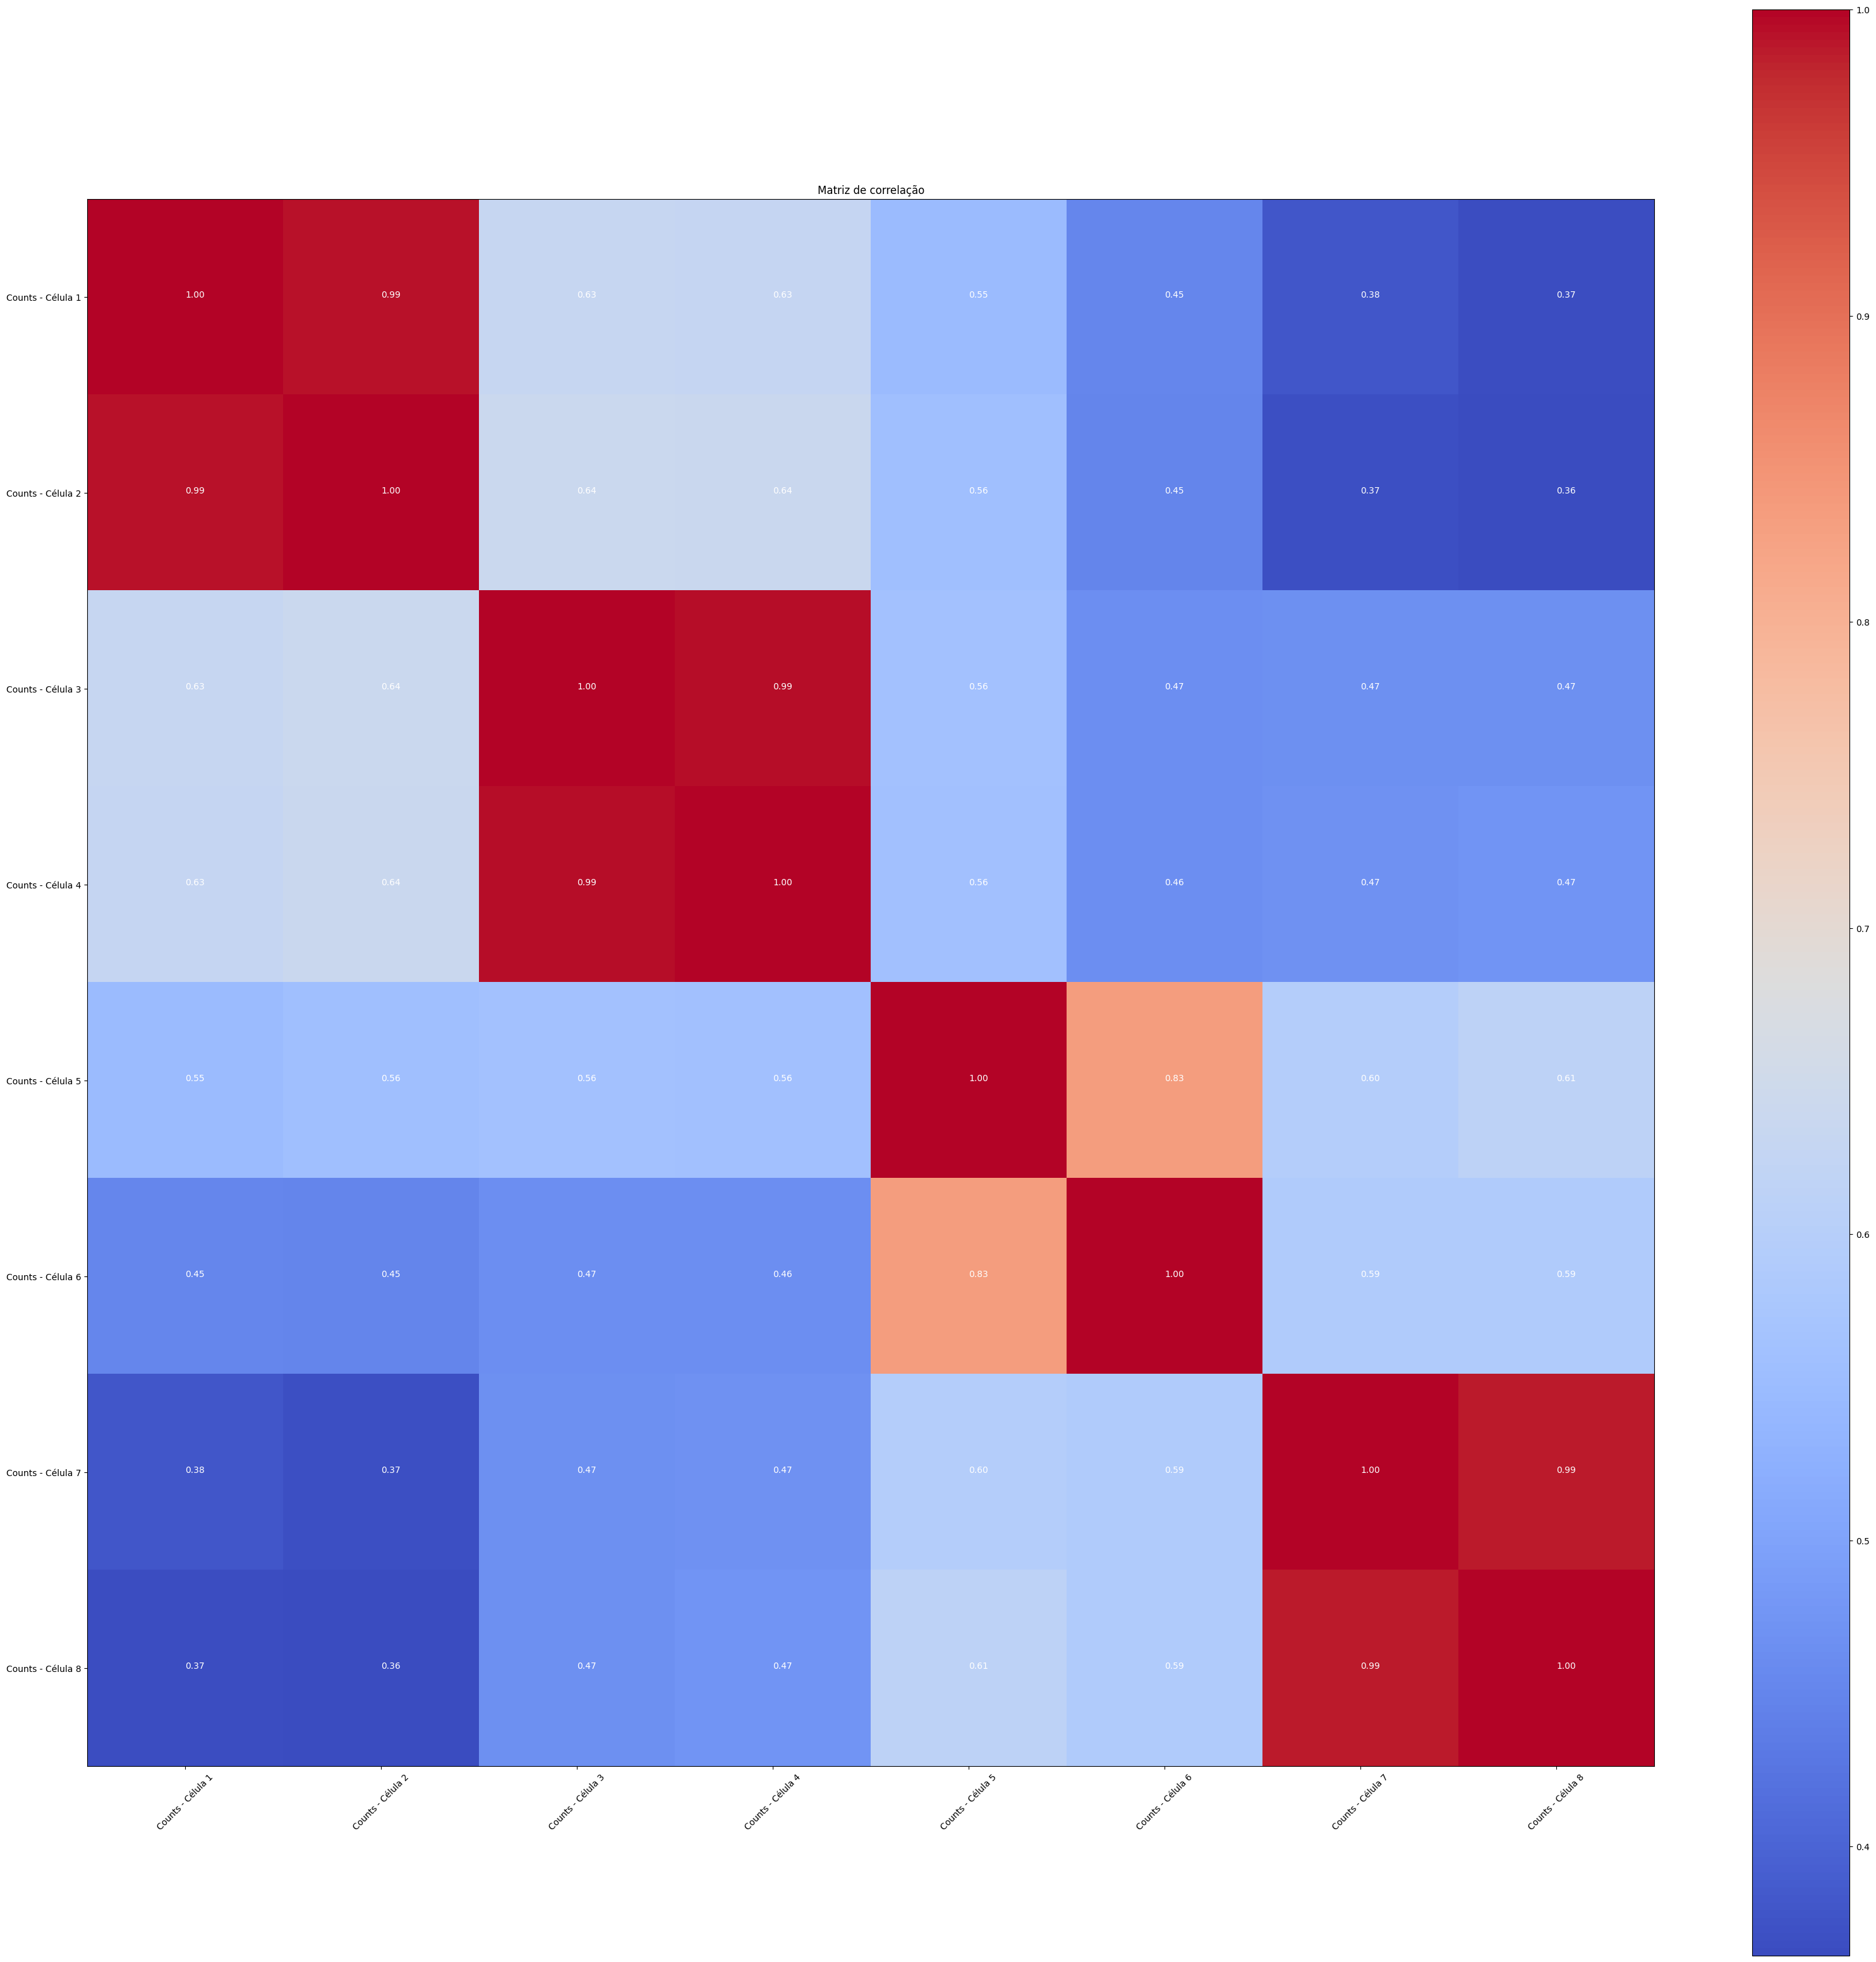

In [ ]:
corr = dados_celula_selecionados_counts.corr()


plt.figure(figsize=(40, 40))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# Mostre as porcentagens de correlação no gráfico
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, f'{corr.iloc[i, j]:.2f}', color='white', size='10')

plt.title('Matriz de correlação')
plt.show()

*   **Análise de Temperatura**


In [ ]:
dados_celula_selecionados_temp = dados_celula[['Temperatura Placa - Célula 1','Temperatura - Célula 1','Temperatura Placa - Célula 2','Temperatura - Célula 2','Temperatura Placa - Célula 3','Temperatura - Célula 3','Temperatura Placa - Célula 4','Temperatura - Célula 4','Temperatura Placa - Célula 5','Temperatura - Célula 5','Temperatura Placa - Célula 6','Temperatura - Célula 6','Temperatura Placa - Célula 7','Temperatura - Célula 7','Temperatura Placa - Célula 8','Temperatura - Célula 8']]

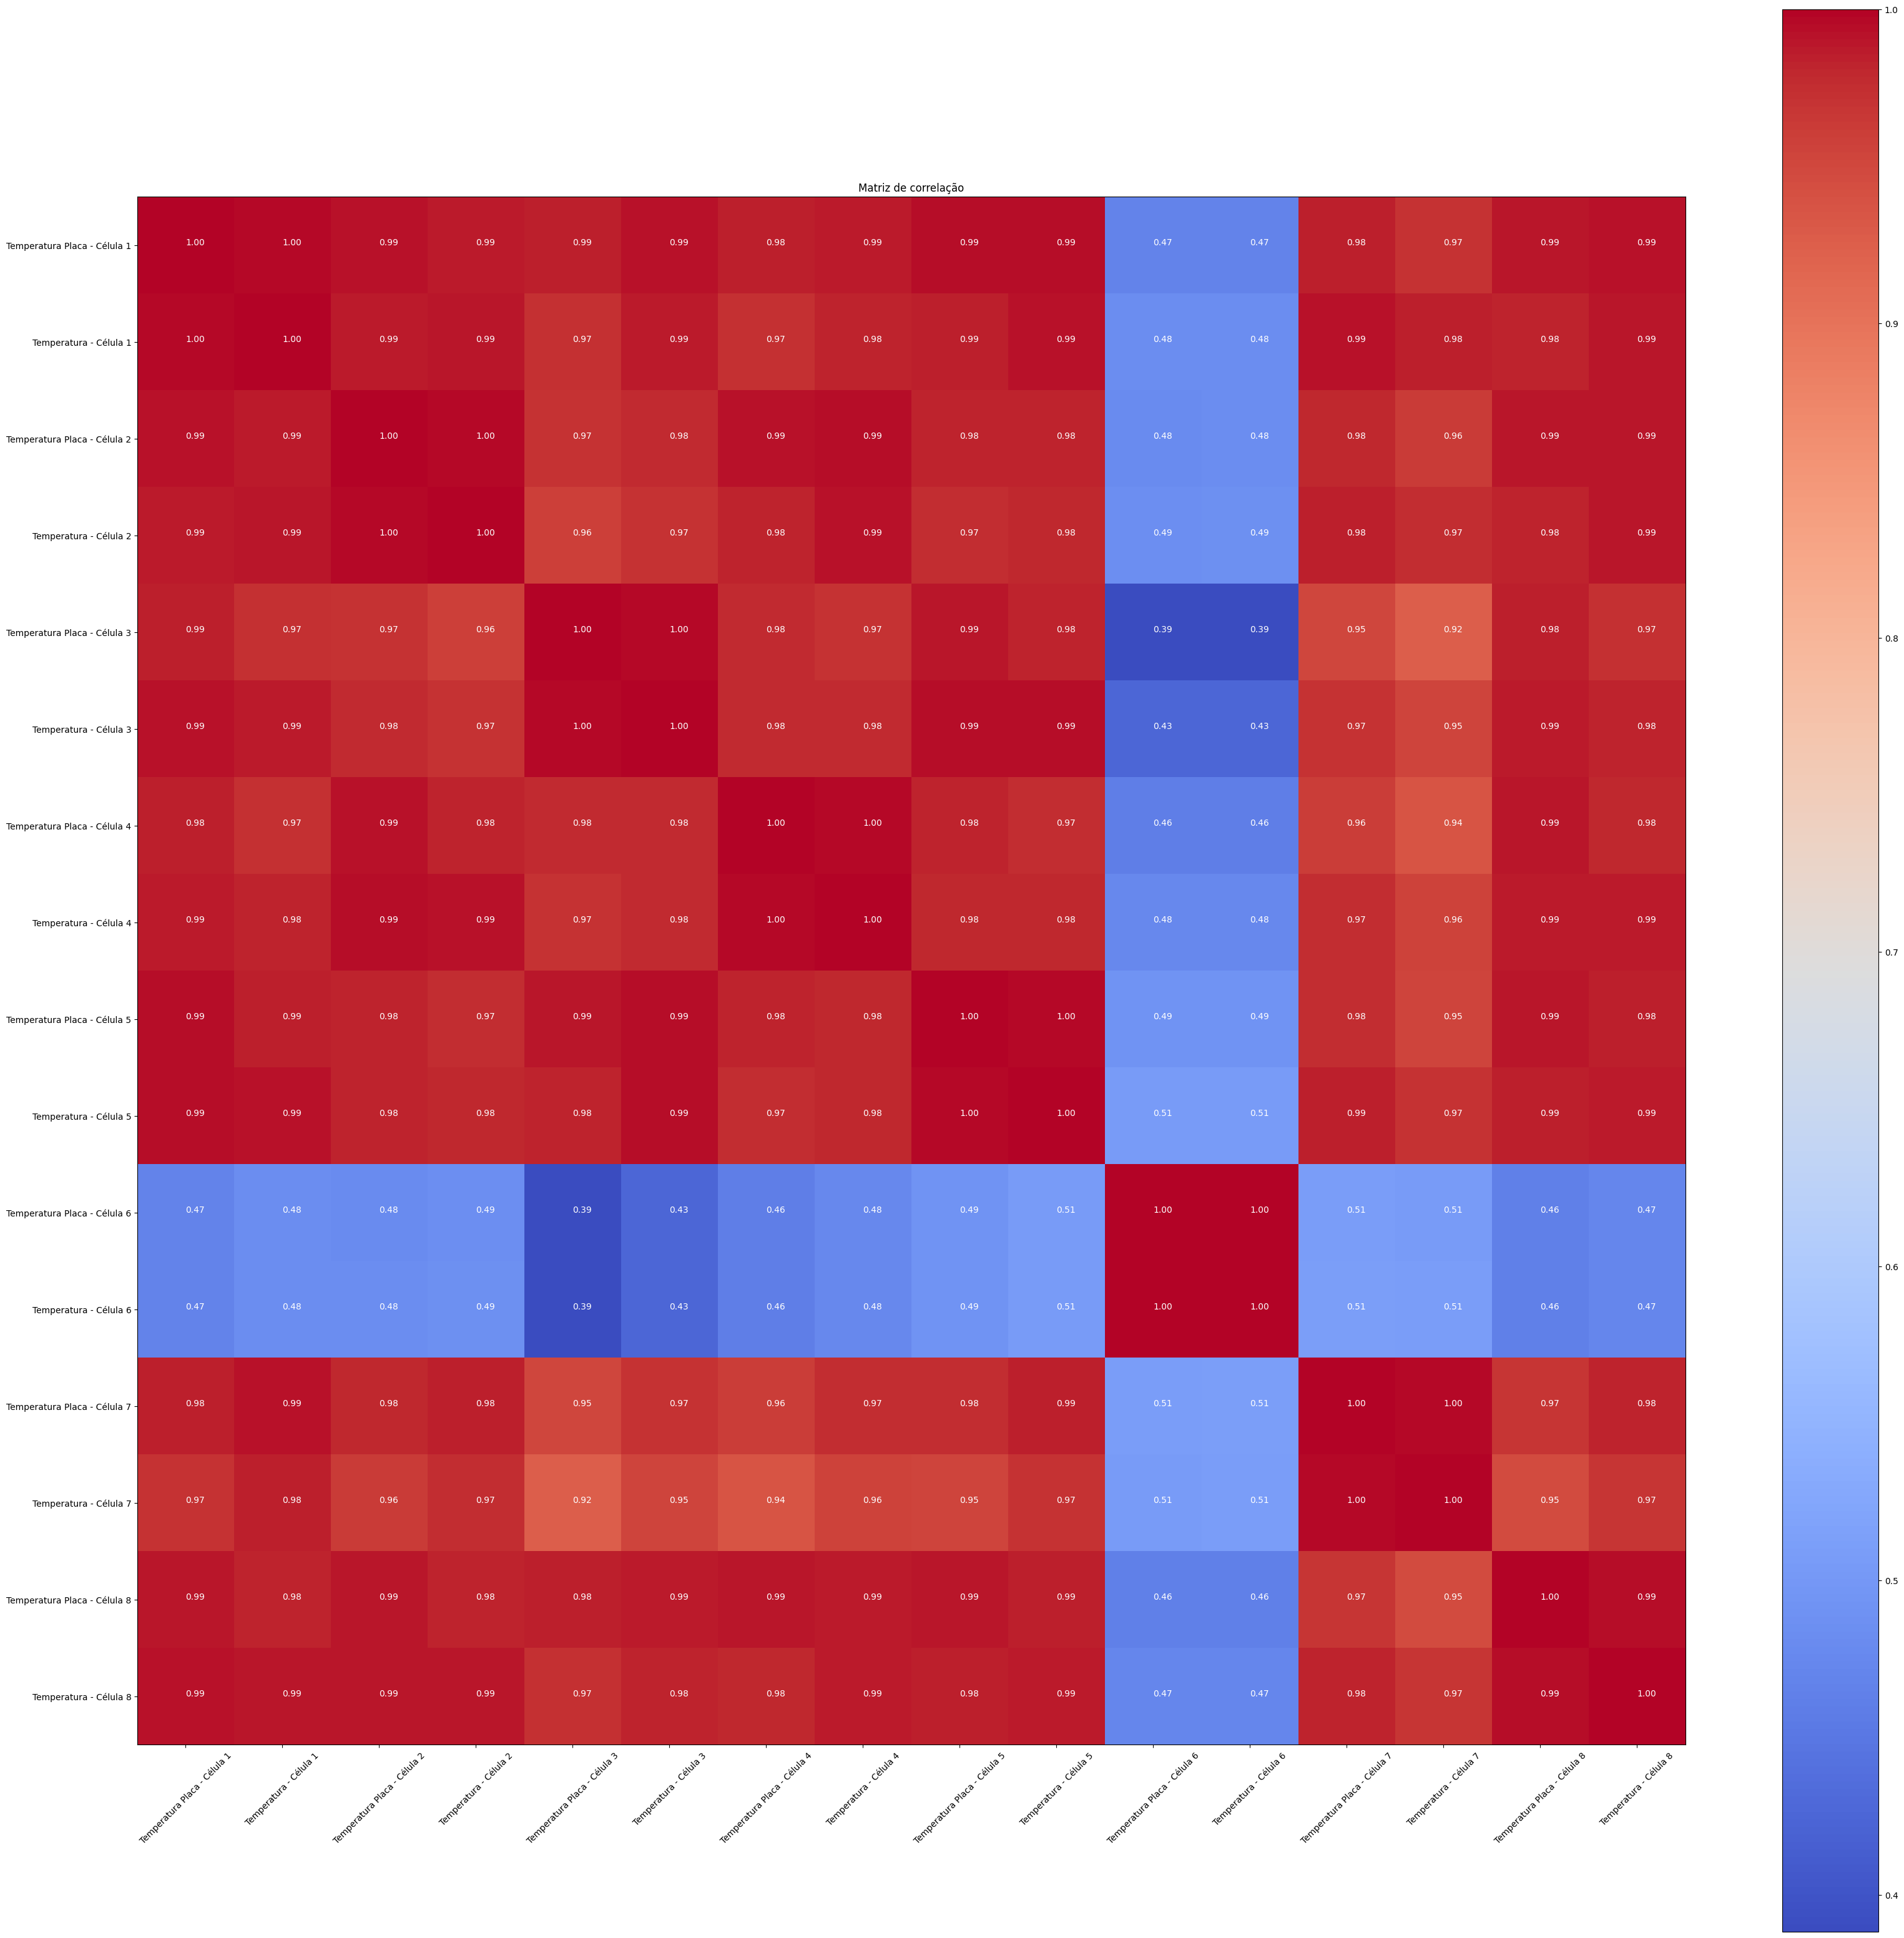

In [ ]:
corr = dados_celula_selecionados_temp.corr()


plt.figure(figsize=(40, 40))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# Mostre as porcentagens de correlação no gráfico
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, f'{corr.iloc[i, j]:.2f}', color='white', size='10')

plt.title('Matriz de correlação')
plt.show()

---



**Tratamento dos dados**

*   Data e Horário




In [ ]:
dados_celula_selecionados

,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,...,Temperatura - Célula 5,Counts - Célula 6,Temperatura Placa - Célula 6,Temperatura - Célula 6,Counts - Célula 7,Temperatura Placa - Célula 7,Temperatura - Célula 7,Counts - Célula 8,Temperatura Placa - Célula 8,Temperatura - Célula 8
5016,03/06/2023,11:09:21.6466667,03/06/2023T11:09:21.6466667,-300,-300,0,0,0,39463,19.6250,...,20.3125,55877,20.0000,19.0000,36312,20.3750,19.6250,34827,19.5000,18.8125
5015,03/06/2023,11:09:26.5900000,03/06/2023T11:09:26.5900000,0,0,0,-303,302,39463,19.6875,...,20.3125,55880,20.0625,19.0000,36317,20.5000,19.6250,34831,19.5625,18.8125
5014,03/06/2023,11:10:24.8033333,03/06/2023T11:10:24.8033333,13400,13400,0,-303,294,37892,21.0625,...,20.3125,97748,21.5625,19.0000,42480,21.9375,19.6250,40319,20.8750,18.8125
5013,03/06/2023,11:10:29.9433333,03/06/2023T11:10:29.9433333,13420,13420,0,-303,294,37962,21.1250,...,20.3750,98510,21.6875,19.0000,41898,22.0625,19.6250,39796,20.9375,18.8125
5012,03/06/2023,11:12:24.4300000,03/06/2023T11:12:24.4300000,10,10,0,-303,294,39357,22.5625,...,20.3750,55871,23.3125,19.0625,36180,23.6875,19.6875,34867,22.4375,18.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,19/05/2023,03:10:43.9766667,19/05/2023T03:10:43.9766667,70,70,0,-311,345,33229,19.0000,...,15.0625,61248,19.1875,14.7500,29056,21.3125,17.1250,29553,17.6875,14.1250
3,19/05/2023,03:10:58.1800000,19/05/2023T03:10:58.1800000,0,0,0,-311,345,32857,18.9375,...,15.0625,61251,19.1875,14.7500,29054,21.3125,17.1250,29551,17.6875,14.1250
2,19/05/2023,03:25:59.1333333,19/05/2023T03:25:59.1333333,0,0,0,-311,345,32797,18.8125,...,14.9375,61313,19.1250,14.6250,29009,21.1875,16.9375,29493,17.6250,14.0000
1,19/05/2023,03:40:59.9500000,19/05/2023T03:40:59.9500000,0,0,0,-311,345,32763,18.6875,...,14.7500,61346,19.0000,14.5000,28968,21.0000,16.7500,29451,17.4375,13.8750


In [ ]:

dados_celula_selecionados['Data e Hora'] = dados_celula_selecionados['Data e Hora'].astype('datetime64[ns]')
dados_celula_selecionados = dados_celula_selecionados.sort_values('Data e Hora', ascending=True)
dados_celula_selecionados['Dif. Data e Hora'] = dados_celula_selecionados['Data e Hora'].diff()

dados_celula_selecionados

<ipython-input-19-b20815ae1c3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_celula_selecionados['Data e Hora'] = dados_celula_selecionados['Data e Hora'].astype('datetime64[ns]')


,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,...,Counts - Célula 6,Temperatura Placa - Célula 6,Temperatura - Célula 6,Counts - Célula 7,Temperatura Placa - Célula 7,Temperatura - Célula 7,Counts - Célula 8,Temperatura Placa - Célula 8,Temperatura - Célula 8,Dif. Data e Hora
5016,03/06/2023,11:09:21.6466667,2023-03-06 11:09:21.646666,-300,-300,0,0,0,39463,19.6250,...,55877,20.0000,19.0000,36312,20.3750,19.6250,34827,19.5000,18.8125,NaT
5015,03/06/2023,11:09:26.5900000,2023-03-06 11:09:26.590000,0,0,0,-303,302,39463,19.6875,...,55880,20.0625,19.0000,36317,20.5000,19.6250,34831,19.5625,18.8125,0 days 00:00:04.943334
5014,03/06/2023,11:10:24.8033333,2023-03-06 11:10:24.803333,13400,13400,0,-303,294,37892,21.0625,...,97748,21.5625,19.0000,42480,21.9375,19.6250,40319,20.8750,18.8125,0 days 00:00:58.213333
5013,03/06/2023,11:10:29.9433333,2023-03-06 11:10:29.943333,13420,13420,0,-303,294,37962,21.1250,...,98510,21.6875,19.0000,41898,22.0625,19.6250,39796,20.9375,18.8125,0 days 00:00:05.140000
5012,03/06/2023,11:12:24.4300000,2023-03-06 11:12:24.430000,10,10,0,-303,294,39357,22.5625,...,55871,23.3125,19.0625,36180,23.6875,19.6875,34867,22.4375,18.8750,0 days 00:01:54.486667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,19/05/2023,03:10:43.9766667,2023-05-19 03:10:43.976666,70,70,0,-311,345,33229,19.0000,...,61248,19.1875,14.7500,29056,21.3125,17.1250,29553,17.6875,14.1250,0 days 00:12:07.843333
3,19/05/2023,03:10:58.1800000,2023-05-19 03:10:58.180000,0,0,0,-311,345,32857,18.9375,...,61251,19.1875,14.7500,29054,21.3125,17.1250,29551,17.6875,14.1250,0 days 00:00:14.203334
2,19/05/2023,03:25:59.1333333,2023-05-19 03:25:59.133333,0,0,0,-311,345,32797,18.8125,...,61313,19.1250,14.6250,29009,21.1875,16.9375,29493,17.6250,14.0000,0 days 00:15:00.953333
1,19/05/2023,03:40:59.9500000,2023-05-19 03:40:59.950000,0,0,0,-311,345,32763,18.6875,...,61346,19.0000,14.5000,28968,21.0000,16.7500,29451,17.4375,13.8750,0 days 00:15:00.816667




*   Minutos



In [ ]:
dados_celula_selecionados['Minutos - Dif. Data e Hora'] = dados_celula_selecionados['Data e Hora'].dt.minute
dados_celula_selecionados['Minutos - Dif. Data e Hora'] = dados_celula_selecionados['Minutos - Dif. Data e Hora'].diff()

In [ ]:
linhas = len(dados_celula_selecionados)-1
i = 0

while i <= linhas:
  if  dados_celula_selecionados['Minutos - Dif. Data e Hora'][i] < 0:
    dados_celula_selecionados['Minutos - Dif. Data e Hora'][i] = dados_celula_selecionados['Minutos - Dif. Data e Hora'][i] + 60

  i += 1

<ipython-input-21-c313ed0c4fb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_celula_selecionados['Minutos - Dif. Data e Hora'][i] = dados_celula_selecionados['Minutos - Dif. Data e Hora'][i] + 60


In [ ]:
dados_celula_selecionados

,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,...,Temperatura Placa - Célula 6,Temperatura - Célula 6,Counts - Célula 7,Temperatura Placa - Célula 7,Temperatura - Célula 7,Counts - Célula 8,Temperatura Placa - Célula 8,Temperatura - Célula 8,Dif. Data e Hora,Minutos - Dif. Data e Hora
5016,03/06/2023,11:09:21.6466667,2023-03-06 11:09:21.646666,-300,-300,0,0,0,39463,19.6250,...,20.0000,19.0000,36312,20.3750,19.6250,34827,19.5000,18.8125,NaT,NaN
5015,03/06/2023,11:09:26.5900000,2023-03-06 11:09:26.590000,0,0,0,-303,302,39463,19.6875,...,20.0625,19.0000,36317,20.5000,19.6250,34831,19.5625,18.8125,0 days 00:00:04.943334,0.0
5014,03/06/2023,11:10:24.8033333,2023-03-06 11:10:24.803333,13400,13400,0,-303,294,37892,21.0625,...,21.5625,19.0000,42480,21.9375,19.6250,40319,20.8750,18.8125,0 days 00:00:58.213333,1.0
5013,03/06/2023,11:10:29.9433333,2023-03-06 11:10:29.943333,13420,13420,0,-303,294,37962,21.1250,...,21.6875,19.0000,41898,22.0625,19.6250,39796,20.9375,18.8125,0 days 00:00:05.140000,0.0
5012,03/06/2023,11:12:24.4300000,2023-03-06 11:12:24.430000,10,10,0,-303,294,39357,22.5625,...,23.3125,19.0625,36180,23.6875,19.6875,34867,22.4375,18.8750,0 days 00:01:54.486667,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,19/05/2023,03:10:43.9766667,2023-05-19 03:10:43.976666,70,70,0,-311,345,33229,19.0000,...,19.1875,14.7500,29056,21.3125,17.1250,29553,17.6875,14.1250,0 days 00:12:07.843333,12.0
3,19/05/2023,03:10:58.1800000,2023-05-19 03:10:58.180000,0,0,0,-311,345,32857,18.9375,...,19.1875,14.7500,29054,21.3125,17.1250,29551,17.6875,14.1250,0 days 00:00:14.203334,0.0
2,19/05/2023,03:25:59.1333333,2023-05-19 03:25:59.133333,0,0,0,-311,345,32797,18.8125,...,19.1250,14.6250,29009,21.1875,16.9375,29493,17.6250,14.0000,0 days 00:15:00.953333,15.0
1,19/05/2023,03:40:59.9500000,2023-05-19 03:40:59.950000,0,0,0,-311,345,32763,18.6875,...,19.0000,14.5000,28968,21.0000,16.7500,29451,17.4375,13.8750,0 days 00:15:00.816667,15.0


In [ ]:
dados_celula_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5017 entries, 5016 to 0
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Data                          5017 non-null   object         
 1   Hora                          5017 non-null   object         
 2   Data e Hora                   5017 non-null   datetime64[ns] 
 3   Bruto                         5017 non-null   int64          
 4   Líquido                       5017 non-null   int64          
 5   Tara                          5017 non-null   int64          
 6   Zero capturado                5017 non-null   int64          
 7   Manutenção do zero            5017 non-null   int64          
 8   Counts - Célula 1             5017 non-null   int64          
 9   Temperatura Placa - Célula 1  5017 non-null   float64        
 10  Temperatura - Célula 1        5017 non-null   float64        
 11  Counts - Célula 2



*   Segundos



In [ ]:
dados_celula_selecionados['Segundos - Dif. Data e Hora'] = dados_celula_selecionados['Data e Hora'].dt.second
dados_celula_selecionados['Segundos - Dif. Data e Hora'] = dados_celula_selecionados['Segundos - Dif. Data e Hora'].diff()

In [ ]:
linhas = len(dados_celula_selecionados)-1
i = 0

while i <= linhas:
  if  dados_celula_selecionados['Segundos - Dif. Data e Hora'][i] < 0:
    dados_celula_selecionados['Segundos - Dif. Data e Hora'][i] = dados_celula_selecionados['Segundos - Dif. Data e Hora'][i]

  i += 1

<ipython-input-25-422eb2ecbb7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_celula_selecionados['Segundos - Dif. Data e Hora'][i] = dados_celula_selecionados['Segundos - Dif. Data e Hora'][i]


In [ ]:
dados_celula_selecionados.head(25)

,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,...,Temperatura - Célula 6,Counts - Célula 7,Temperatura Placa - Célula 7,Temperatura - Célula 7,Counts - Célula 8,Temperatura Placa - Célula 8,Temperatura - Célula 8,Dif. Data e Hora,Minutos - Dif. Data e Hora,Segundos - Dif. Data e Hora
5016,03/06/2023,11:09:21.6466667,2023-03-06 11:09:21.646666,-300,-300,0,0,0,39463,19.6250,...,19.0000,36312,20.3750,19.6250,34827,19.5000,18.8125,NaT,NaN,NaN
5015,03/06/2023,11:09:26.5900000,2023-03-06 11:09:26.590000,0,0,0,-303,302,39463,19.6875,...,19.0000,36317,20.5000,19.6250,34831,19.5625,18.8125,0 days 00:00:04.943334,0.0,5.0
5014,03/06/2023,11:10:24.8033333,2023-03-06 11:10:24.803333,13400,13400,0,-303,294,37892,21.0625,...,19.0000,42480,21.9375,19.6250,40319,20.8750,18.8125,0 days 00:00:58.213333,1.0,-2.0
5013,03/06/2023,11:10:29.9433333,2023-03-06 11:10:29.943333,13420,13420,0,-303,294,37962,21.1250,...,19.0000,41898,22.0625,19.6250,39796,20.9375,18.8125,0 days 00:00:05.140000,0.0,5.0
5012,03/06/2023,11:12:24.4300000,2023-03-06 11:12:24.430000,10,10,0,-303,294,39357,22.5625,...,19.0625,36180,23.6875,19.6875,34867,22.4375,18.8750,0 days 00:01:54.486667,2.0,-5.0
5011,03/06/2023,11:12:29.5000000,2023-03-06 11:12:29.500000,0,0,0,-303,289,39359,22.6250,...,19.0625,36181,23.6875,19.6875,34861,22.5000,18.8750,0 days 00:00:05.070000,0.0,5.0
5010,03/06/2023,11:13:14.3866667,2023-03-06 11:13:14.386666,4850,4850,0,-303,289,39346,22.9375,...,19.1250,43646,24.0000,19.6875,44614,22.7500,18.9375,0 days 00:00:44.886666,1.0,-15.0
5009,03/06/2023,11:13:19.5400000,2023-03-06 11:13:19.540000,4860,4860,0,-303,289,39354,23.0000,...,19.1250,43658,24.0000,19.6875,44789,22.8125,18.9375,0 days 00:00:05.153334,0.0,5.0
5008,03/06/2023,11:13:27.2700000,2023-03-06 11:13:27.270000,4790,4790,0,-303,289,39350,23.0625,...,19.1250,43752,24.0625,19.6875,44718,22.8125,18.9375,0 days 00:00:07.730000,0.0,8.0
5007,03/06/2023,11:15:02.6766667,2023-03-06 11:15:02.676666,4860,4860,0,-303,289,39300,23.3750,...,19.1250,43762,24.3750,19.7500,45372,23.1875,19.0000,0 days 00:01:35.406666,2.0,-25.0




*   Identificação dos atendimentos




In [ ]:
dados_celula_selecionados['Bruto'] = dados_celula_selecionados['Bruto'].astype(int)

In [ ]:
dados_celula_selecionados['Manutenção do zero'] = dados_celula_selecionados['Manutenção do zero'].astype(float)

In [ ]:
dados_celula_selecionados['Zero capturado'] = dados_celula_selecionados['Zero capturado'].astype(float)

In [ ]:
media_zero_captado = int(dados_celula_selecionados['Zero capturado'].mean())
media_zero_captado_20 = int(media_zero_captado * 1.2)

media_manutencao_zero = int(dados_celula_selecionados['Manutenção do zero'].mean())

In [ ]:
linhas = len(dados_celula_selecionados)-1
i = 0

while i <= linhas:

  if dados_celula_selecionados['Minutos - Dif. Data e Hora'][i] > 0 and dados_celula_selecionados['Segundos - Dif. Data e Hora'][i] < 0:
    dados_celula_selecionados.loc[i,'Status de Atendimento'] = "Términio de Atendimento"

  elif dados_celula_selecionados['Bruto'][i] > media_zero_captado and dados_celula_selecionados['Bruto'][i] < media_manutencao_zero:
    dados_celula_selecionados.loc[i,'Status de Atendimento'] = "Calibração Auto"

  elif dados_celula_selecionados['Bruto'][i] < media_zero_captado_20 and dados_celula_selecionados['Bruto'][i] > media_manutencao_zero:
    dados_celula_selecionados.loc[i,'Status de Atendimento'] = "Falha"
  else:
    dados_celula_selecionados.loc[i,'Status de Atendimento'] = "Atendimento"

  i += 1

In [ ]:
media_tempo_status = dados_celula_selecionados.groupby('Status de Atendimento').mean()

<ipython-input-32-aaa00dc6dd32>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_tempo_status = dados_celula_selecionados.groupby('Status de Atendimento').mean()


In [ ]:
media_tempo_status

,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,Temperatura - Célula 1,Counts - Célula 2,Temperatura Placa - Célula 2,...,Temperatura Placa - Célula 6,Temperatura - Célula 6,Counts - Célula 7,Temperatura Placa - Célula 7,Temperatura - Célula 7,Counts - Célula 8,Temperatura Placa - Célula 8,Temperatura - Célula 8,Minutos - Dif. Data e Hora,Segundos - Dif. Data e Hora
Status de Atendimento,,,,,,,,,,,,,,,,,,,,,
Atendimento,18576.93497,18576.93497,0.0,-308.582083,310.805821,49087.260118,23.403195,19.070117,38865.210550,23.132759,...,23.364598,18.560567,47692.604820,24.595612,20.138415,48527.111414,21.986926,17.901518,0.801183,12.232029
Calibração Auto,-1.17141,-1.17141,0.0,-256.624752,249.024487,36588.467240,21.752647,17.386623,26030.555261,21.460870,...,-18.003433,-21.175877,32468.268034,22.939899,18.474272,33205.812707,20.362467,16.306089,1.575778,9.337525
Términio de Atendimento,12792.06580,12792.06580,0.0,-298.244070,297.697016,44873.410865,23.073690,18.711505,34464.460597,22.805327,...,15.294711,10.785243,42928.746748,24.228147,19.745935,43626.251721,21.678749,17.569195,2.237950,-31.381790


In [ ]:
linhas = len(dados_celula_selecionados)-1
i = linhas
x = 0

while i > 0:
  x += 1
  y = i-1

  while dados_celula_selecionados['Status de Atendimento'][y] == dados_celula_selecionados['Status de Atendimento'][i]:
    dados_celula_selecionados.loc[i,'id_Atendimento'] = str(x)
    dados_celula_selecionados.loc[y,'id_Atendimento'] = str(x)
    i -= 1
  else:
    x += 1
    dados_celula_selecionados.loc[i,'id_Atendimento'] = str(x)

  i -= 1

In [ ]:
dados_celula_selecionados.head(25)

,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,...,Temperatura Placa - Célula 7,Temperatura - Célula 7,Counts - Célula 8,Temperatura Placa - Célula 8,Temperatura - Célula 8,Dif. Data e Hora,Minutos - Dif. Data e Hora,Segundos - Dif. Data e Hora,Status de Atendimento,id_Atendimento
5016,03/06/2023,11:09:21.6466667,2023-03-06 11:09:21.646666,-300,-300,0,0.0,0.0,39463,19.6250,...,20.3750,19.6250,34827,19.5000,18.8125,NaT,NaN,NaN,Atendimento,2
5015,03/06/2023,11:09:26.5900000,2023-03-06 11:09:26.590000,0,0,0,-303.0,302.0,39463,19.6875,...,20.5000,19.6250,34831,19.5625,18.8125,0 days 00:00:04.943334,0.0,5.0,Calibração Auto,4
5014,03/06/2023,11:10:24.8033333,2023-03-06 11:10:24.803333,13400,13400,0,-303.0,294.0,37892,21.0625,...,21.9375,19.6250,40319,20.8750,18.8125,0 days 00:00:58.213333,1.0,-2.0,Términio de Atendimento,6
5013,03/06/2023,11:10:29.9433333,2023-03-06 11:10:29.943333,13420,13420,0,-303.0,294.0,37962,21.1250,...,22.0625,19.6250,39796,20.9375,18.8125,0 days 00:00:05.140000,0.0,5.0,Atendimento,8
5012,03/06/2023,11:12:24.4300000,2023-03-06 11:12:24.430000,10,10,0,-303.0,294.0,39357,22.5625,...,23.6875,19.6875,34867,22.4375,18.8750,0 days 00:01:54.486667,2.0,-5.0,Términio de Atendimento,10
5011,03/06/2023,11:12:29.5000000,2023-03-06 11:12:29.500000,0,0,0,-303.0,289.0,39359,22.6250,...,23.6875,19.6875,34861,22.5000,18.8750,0 days 00:00:05.070000,0.0,5.0,Calibração Auto,12
5010,03/06/2023,11:13:14.3866667,2023-03-06 11:13:14.386666,4850,4850,0,-303.0,289.0,39346,22.9375,...,24.0000,19.6875,44614,22.7500,18.9375,0 days 00:00:44.886666,1.0,-15.0,Términio de Atendimento,14
5009,03/06/2023,11:13:19.5400000,2023-03-06 11:13:19.540000,4860,4860,0,-303.0,289.0,39354,23.0000,...,24.0000,19.6875,44789,22.8125,18.9375,0 days 00:00:05.153334,0.0,5.0,Atendimento,15
5008,03/06/2023,11:13:27.2700000,2023-03-06 11:13:27.270000,4790,4790,0,-303.0,289.0,39350,23.0625,...,24.0625,19.6875,44718,22.8125,18.9375,0 days 00:00:07.730000,0.0,8.0,Atendimento,15
5007,03/06/2023,11:15:02.6766667,2023-03-06 11:15:02.676666,4860,4860,0,-303.0,289.0,39300,23.3750,...,24.3750,19.7500,45372,23.1875,19.0000,0 days 00:01:35.406666,2.0,-25.0,Términio de Atendimento,16


In [ ]:
dados_celula_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5017 entries, 5016 to 0
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Data                          5017 non-null   object         
 1   Hora                          5017 non-null   object         
 2   Data e Hora                   5017 non-null   datetime64[ns] 
 3   Bruto                         5017 non-null   int64          
 4   Líquido                       5017 non-null   int64          
 5   Tara                          5017 non-null   int64          
 6   Zero capturado                5017 non-null   float64        
 7   Manutenção do zero            5017 non-null   float64        
 8   Counts - Célula 1             5017 non-null   int64          
 9   Temperatura Placa - Célula 1  5017 non-null   float64        
 10  Temperatura - Célula 1        5017 non-null   float64        
 11  Counts - Célula 2

In [ ]:
dados_celula_selecionados_atendimentos = dados_celula_selecionados.copy()
dados_celula_selecionados_atendimentos = dados_celula_selecionados_atendimentos.drop(['Data e Hora','Hora','Data','Dif. Data e Hora','Segundos - Dif. Data e Hora','Minutos - Dif. Data e Hora','Manutenção do zero' ,'Zero capturado','Tara','Líquido', 'Bruto' ,'Temperatura Placa - Célula 1','Temperatura - Célula 1','Temperatura Placa - Célula 2','Temperatura - Célula 2','Temperatura Placa - Célula 3','Temperatura - Célula 3','Temperatura Placa - Célula 4','Temperatura - Célula 4','Temperatura Placa - Célula 5','Temperatura - Célula 5','Temperatura Placa - Célula 6','Temperatura - Célula 6','Temperatura Placa - Célula 7','Temperatura - Célula 7','Temperatura Placa - Célula 8','Temperatura - Célula 8','Counts - Célula 1','Counts - Célula 2','Counts - Célula 3','Counts - Célula 4','Counts - Célula 5','Counts - Célula 6','Counts - Célula 7','Counts - Célula 8'], axis = 1)

In [ ]:
counts = dados_celula_selecionados_atendimentos.groupby('Status de Atendimento')['id_Atendimento'].nunique()

print(counts)

Status de Atendimento
Atendimento                1118
Calibração Auto             778
Términio de Atendimento    1260
Name: id_Atendimento, dtype: int64




---

Análise das Células

In [ ]:
dados_celulas_selecionaodos_1 = dados_celula_selecionados.copy()
dados_celulas_selecionaodos_1 = dados_celulas_selecionaodos_1.drop(['Temperatura Placa - Célula 2','Temperatura - Célula 2','Temperatura Placa - Célula 3','Temperatura - Célula 3','Temperatura Placa - Célula 4','Temperatura - Célula 4','Temperatura Placa - Célula 5','Temperatura - Célula 5','Temperatura Placa - Célula 6','Temperatura - Célula 6','Temperatura Placa - Célula 7','Temperatura - Célula 7','Temperatura Placa - Célula 8','Temperatura - Célula 8','Counts - Célula 2','Counts - Célula 3','Counts - Célula 4','Counts - Célula 5','Counts - Célula 6','Counts - Célula 7','Counts - Célula 8'], axis = 1)

In [ ]:
media_atendimentos = dados_celulas_selecionaodos_1.groupby('Status de Atendimento').mean()

<ipython-input-40-312636db9469>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_atendimentos = dados_celulas_selecionaodos_1.groupby('Status de Atendimento').mean()


In [ ]:
media_atendimentos

,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,Temperatura - Célula 1,Minutos - Dif. Data e Hora,Segundos - Dif. Data e Hora
Status de Atendimento,,,,,,,,,,
Atendimento,18576.93497,18576.93497,0.0,-308.582083,310.805821,49087.260118,23.403195,19.070117,0.801183,12.232029
Calibração Auto,-1.17141,-1.17141,0.0,-256.624752,249.024487,36588.467240,21.752647,17.386623,1.575778,9.337525
Términio de Atendimento,12792.06580,12792.06580,0.0,-298.244070,297.697016,44873.410865,23.073690,18.711505,2.237950,-31.381790


In [ ]:
max_atendimentos = dados_celulas_selecionaodos_1.groupby('Status de Atendimento').max()

In [ ]:
max_atendimentos

,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,Temperatura - Célula 1,Dif. Data e Hora,Minutos - Dif. Data e Hora,Segundos - Dif. Data e Hora,id_Atendimento
Status de Atendimento,,,,,,,,,,,,,,,
Atendimento,19/05/2023,23:58:39.5033333,2023-05-19 02:53:48.243333,60340,60340,0,0.0,360.0,162389,28.4375,24.0,0 days 02:05:08.413334,58.0,59.0,999
Calibração Auto,19/05/2023,23:58:51.2833333,2023-05-19 03:40:59.950000,270,270,0,-154.0,369.0,81743,28.4375,24.0,8 days 17:13:09.190000,15.0,49.0,996
Términio de Atendimento,19/05/2023,23:59:32.7000000,2023-05-19 03:56:00.736666,65600,65600,0,0.0,363.0,110112,28.3750,24.0,30 days 00:13:33.393333,16.0,-1.0,998


In [ ]:
min_atendimentos = dados_celulas_selecionaodos_1.groupby('Status de Atendimento').min()

In [ ]:
min_atendimentos

,Data,Hora,Data e Hora,Bruto,Líquido,Tara,Zero capturado,Manutenção do zero,Counts - Célula 1,Temperatura Placa - Célula 1,Temperatura - Célula 1,Dif. Data e Hora,Minutos - Dif. Data e Hora,Segundos - Dif. Data e Hora,id_Atendimento
Status de Atendimento,,,,,,,,,,,,,,,
Atendimento,03/06/2023,00:00:39.0533333,2023-03-06 11:09:21.646666,-13620,-13620,0,-311.0,0.0,31629,15.875,11.6875,0 days 00:00:00.013333,0.0,0.0,1003
Calibração Auto,03/06/2023,00:00:32.6466667,2023-03-06 11:09:26.590000,-40,-40,0,-311.0,121.0,32687,15.875,11.6875,0 days 00:00:04.373334,0.0,0.0,100
Términio de Atendimento,03/06/2023,00:00:10.2000000,2023-03-06 11:10:24.803333,-310,-310,0,-311.0,0.0,31537,15.875,11.6875,0 days 00:00:01.280000,1.0,-59.0,10
